In [1]:
import pandas as pd
import datetime
import numpy as np
import collections
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
#define function to test whether a sample differs from a normal distribution.
from scipy import stats
def normtest(x):
    k,p = stats.normaltest(x)
    alpha = 1e-3
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected,this sample doesn't come from a normal distribution")
    else:
        print("The null hypothesis cannot be rejected,this sample comes from a normal distribution")

In [5]:
# read the data
data1 = pd.read_csv('dual_tariffs.csv')
data2 = pd.read_csv('elec_gas_tariffs.csv')
data2 = data2[data2['EnergyType']==2]
data = pd.concat([data1,data2])
data.dropna(axis=1, how='all',inplace=True)


data.loc[(np.isnan(data['StandingChargeElec'])==True)&
    (np.isnan(data['UnitRate1Elec'])==False),'StandingChargeElec']=0

data.loc[(np.isnan(data['MonthlyFee'])==True),'MonthlyFee']=0

data['OnSaleStartDate'] = pd.to_datetime(data['OnSaleStartDate'])
data['OnSaleEndDate'] = pd.to_datetime(data['OnSaleEndDate'])

data['OnSaleStartDate'] = data['OnSaleStartDate'].map(lambda x: x.strftime('%Y-%m-%d'))
data['OnSaleEndDate'] = data['OnSaleEndDate'].map(lambda x:x.strftime('%Y-%m-%d'))


std = data.loc[data.MeterType=='STD',:]
e7 = data.loc[data.MeterType=='E7',:]

In [6]:
#compute yearly cost

#0.58/0.42
e7.loc[:,'low_cost'] = (0.58*e7['UnitRate1Elec']+0.42*e7['UnitRateE7Elec'])*2500 + e7['StandingChargeElec']*365 + e7['MonthlyFee']*12
e7.loc[:,'med_cost'] = (0.58*e7['UnitRate1Elec']+0.42*e7['UnitRateE7Elec'])*4200 + e7['StandingChargeElec']*365 + e7['MonthlyFee']*12
e7.loc[:,'hig_cost'] = (0.58*e7['UnitRate1Elec']+0.42*e7['UnitRateE7Elec'])*7100 + e7['StandingChargeElec']*365 + e7['MonthlyFee']*12
std.loc[:,'low_cost'] = std['UnitRate1Elec']*2500 + std['StandingChargeElec']*365 + std['MonthlyFee']*12
std.loc[:,'med_cost'] = std['UnitRate1Elec']*4200 + std['StandingChargeElec']*365 + std['MonthlyFee']*12
std.loc[:,'hig_cost'] = std['UnitRate1Elec']*7100 + std['StandingChargeElec']*365 + std['MonthlyFee']*12

#O.72/0.28
e7.loc[:,'low_cost72'] = (0.72*e7['UnitRate1Elec']+0.28*e7['UnitRateE7Elec'])*2500 + e7['StandingChargeElec']*365 + e7['MonthlyFee']*12
e7.loc[:,'med_cost72'] = (0.72*e7['UnitRate1Elec']+0.28*e7['UnitRateE7Elec'])*4200 + e7['StandingChargeElec']*365 + e7['MonthlyFee']*12
e7.loc[:,'hig_cost72'] = (0.72*e7['UnitRate1Elec']+0.28*e7['UnitRateE7Elec'])*7100 + e7['StandingChargeElec']*365 + e7['MonthlyFee']*12
std.loc[:,'low_cost72'] = std['UnitRate1Elec']*2500 + std['StandingChargeElec']*365 + std['MonthlyFee']*12
std.loc[:,'med_cost72'] = std['UnitRate1Elec']*4200 + std['StandingChargeElec']*365 + std['MonthlyFee']*12
std.loc[:,'hig_cost72'] = std['UnitRate1Elec']*7100 + std['StandingChargeElec']*365 + std['MonthlyFee']*12



In [7]:
#combine into one dataset
data = pd.concat([std,e7])

# Fixed term processing
data1 = data[data['FixedTerm'].str.contains('onths')==False]
data2 = data[data['FixedTerm'].str.contains('onths')==True]
data1[['OnSaleStartDate']] = data1[['OnSaleStartDate']].apply(pd.to_datetime,utc=True)
data1['FixedTerm'] = pd.to_datetime(data1['FixedTerm'],utc=True)
data1.loc[:,'FixedTerm'] = (data1['FixedTerm']-data1['OnSaleStartDate'])/np.timedelta64(1, 'M')
data1['FixedTerm'] = data1['FixedTerm'].astype(int)
data2['FixedTerm'] = data2['FixedTerm'].str.extract('(\d+)')

data = pd.concat([data1,data2])

In [8]:
#columns should be deleted
cols = ['OnSaleEndDate', 'RegulatoryStartDate',
       'RegulatoryEndDate', 'ExitFeeEndDate', 'ExitFeeElec',
         'UnitRate1LimitElec','OnSaleStartDate','UnitRate1Elec','StandingChargeElec','MonthlyFee',
        'EnergySupplierKey','SupplierCode','SupplierName','DiscountFromTotalElecFormat','DiscountFromTotal2ElecFormat',
       'UnitRate2Elec', 'UnitRateE7Elec', 'DiscountFromTotalElec','Key', 'StagingKey', 'TariffCode', 'TariffName',
        'DiscountFromTotal2Elec','LoadDate','ExitFeeGas',
       'StandingChargeGas', 'UnitRate1Gas', 'UnitRate1LimitGas',
       'UnitRate2Gas', 'UnitRate2LimitGas', 'UnitRate3Gas',
       'DiscountFromTotalGas', 'DiscountFromTotalGasFormat',
       'DiscountFromTotal2Gas', 'DiscountGasUnits',
       'DiscountGasMaxRelatedPercent', 'DiscountGasPerUnit2',
       'DiscountGasPerUnitMax','InstallationCost', 'DiscountElecUnits',
       'DiscountElecUnitsFormat', 'DiscountElecRelatedPercent',
       'DiscountElecMaxRelatedPercent', 'DiscountElecPerUnit2',
       'DiscountElecPerUnitMax']

data.dropna(axis=1, how='all',inplace=True)
data = data.drop(columns = cols)

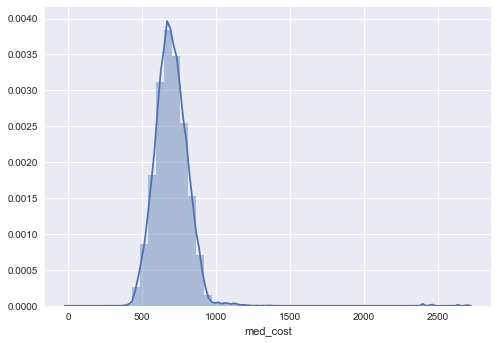

In [40]:
#plot the distribution of cost
sns.distplot(data['med_cost'].dropna()) # take 'med_cost' as a example

In [41]:
# test whether the distribution of cost comes from normal distribution
normtest(data['med_cost'])

The null hypothesis cannot be rejected,this sample comes from a normal distribution


## For 'FixedTerm'

* for the peak/off-peak splif of 0.58/0.42

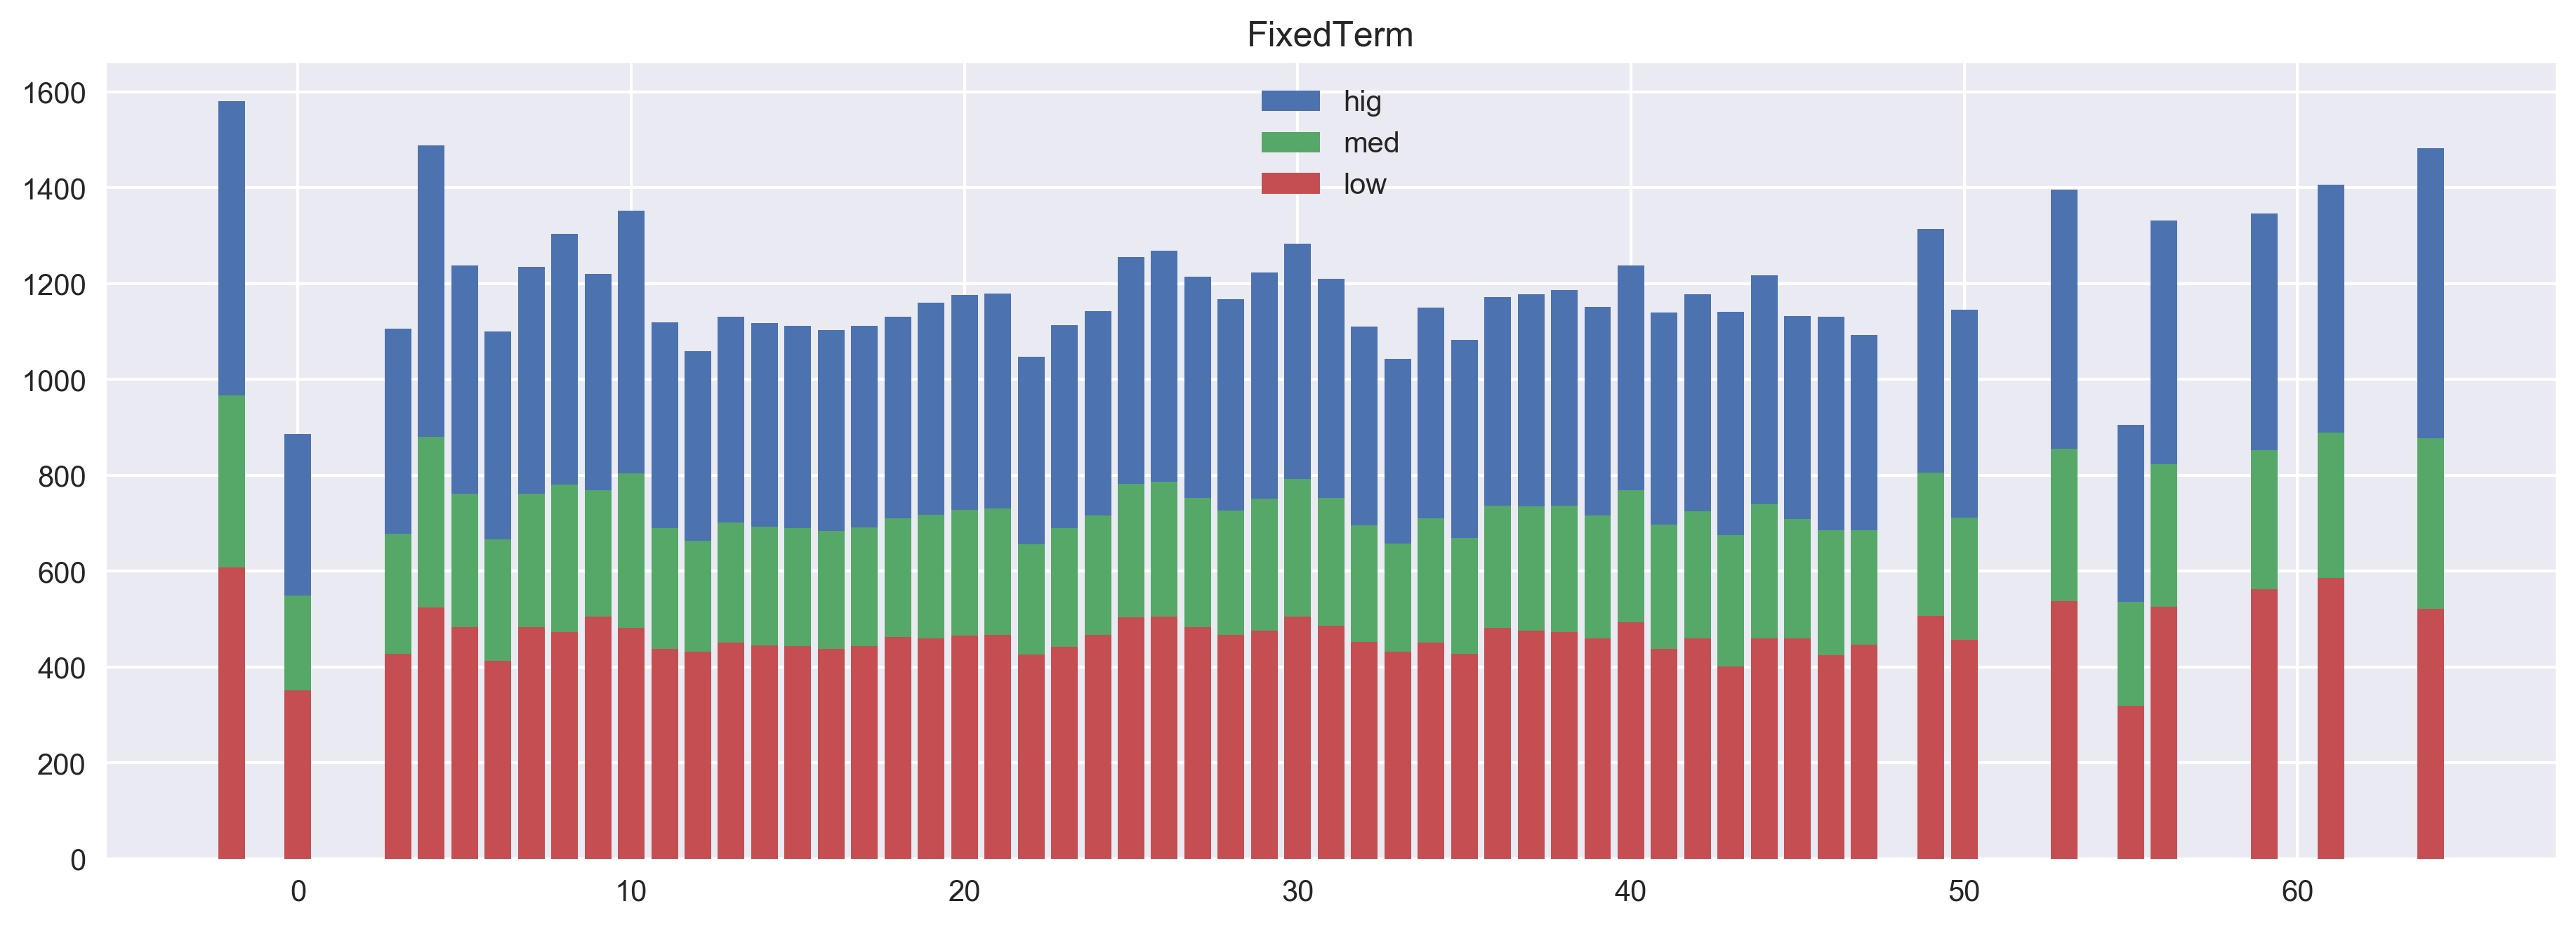

In [18]:
data_fix = data[['FixedTerm','low_cost','med_cost','hig_cost']]
data_fix.loc[:,'FixedTerm'] = data_fix['FixedTerm'].astype(np.float)
data_fixmean = data_fix.groupby('FixedTerm').mean()
data_fixmean.reset_index(inplace=True)

plt.figure(figsize=(15,5),dpi = 300)
plt.bar(data_fixmean['FixedTerm'],data_fixmean['hig_cost'],label='hig')
plt.bar(data_fixmean['FixedTerm'],data_fixmean['med_cost'],label='med')
plt.bar(data_fixmean['FixedTerm'],data_fixmean['low_cost'],label='low')
plt.title('FixedTerm')
plt.legend()

In [19]:
print(collections.Counter(data_fix['FixedTerm']))

Counter({12.0: 258509, 13.0: 83708, 24.0: 55964, 14.0: 50246, 25.0: 46343, 18.0: 27126, 15.0: 23325, 26.0: 17696, 16.0: 17590, 27.0: 11592, 17.0: 11588, 36.0: 10790, 20.0: 8961, 28.0: 8728, 19.0: 6486, 23.0: 4918, 37.0: 4428, 38.0: 4088, 29.0: 3930, 11.0: 3398, 21.0: 3280, 22.0: 3226, 30.0: 2635, 31.0: 2464, 40.0: 1694, 32.0: 1518, 39.0: 1344, 35.0: 1294, 10.0: 914, 34.0: 896, 33.0: 852, 9.0: 772, 5.0: 728, 49.0: 672, 50.0: 672, 41.0: 652, 3.0: 621, 6.0: 616, 44.0: 532, 8.0: 516, 42.0: 500, 61.0: 448, 45.0: 336, 4.0: 280, 47.0: 252, 56.0: 224, 7.0: 224, 46.0: 196, 55.0: 168, 59.0: 112, 43.0: 112, 53.0: 84, 64.0: 62, 0.0: 56, -2.0: 42})


In [20]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_fixmean['hig_cost'].max()-data_fixmean['hig_cost'].min())
print('med_cost:')
print(data_fixmean['med_cost'].max()-data_fixmean['med_cost'].min())
print('low_cost:')
print(data_fixmean['low_cost'].max()-data_fixmean['low_cost'].min())

hig_cost:
694.2717675000005
med_cost:
431.72539500000016
low_cost:
289.08510595238107


* for the peak/off-peak splif of 0.72/0.28

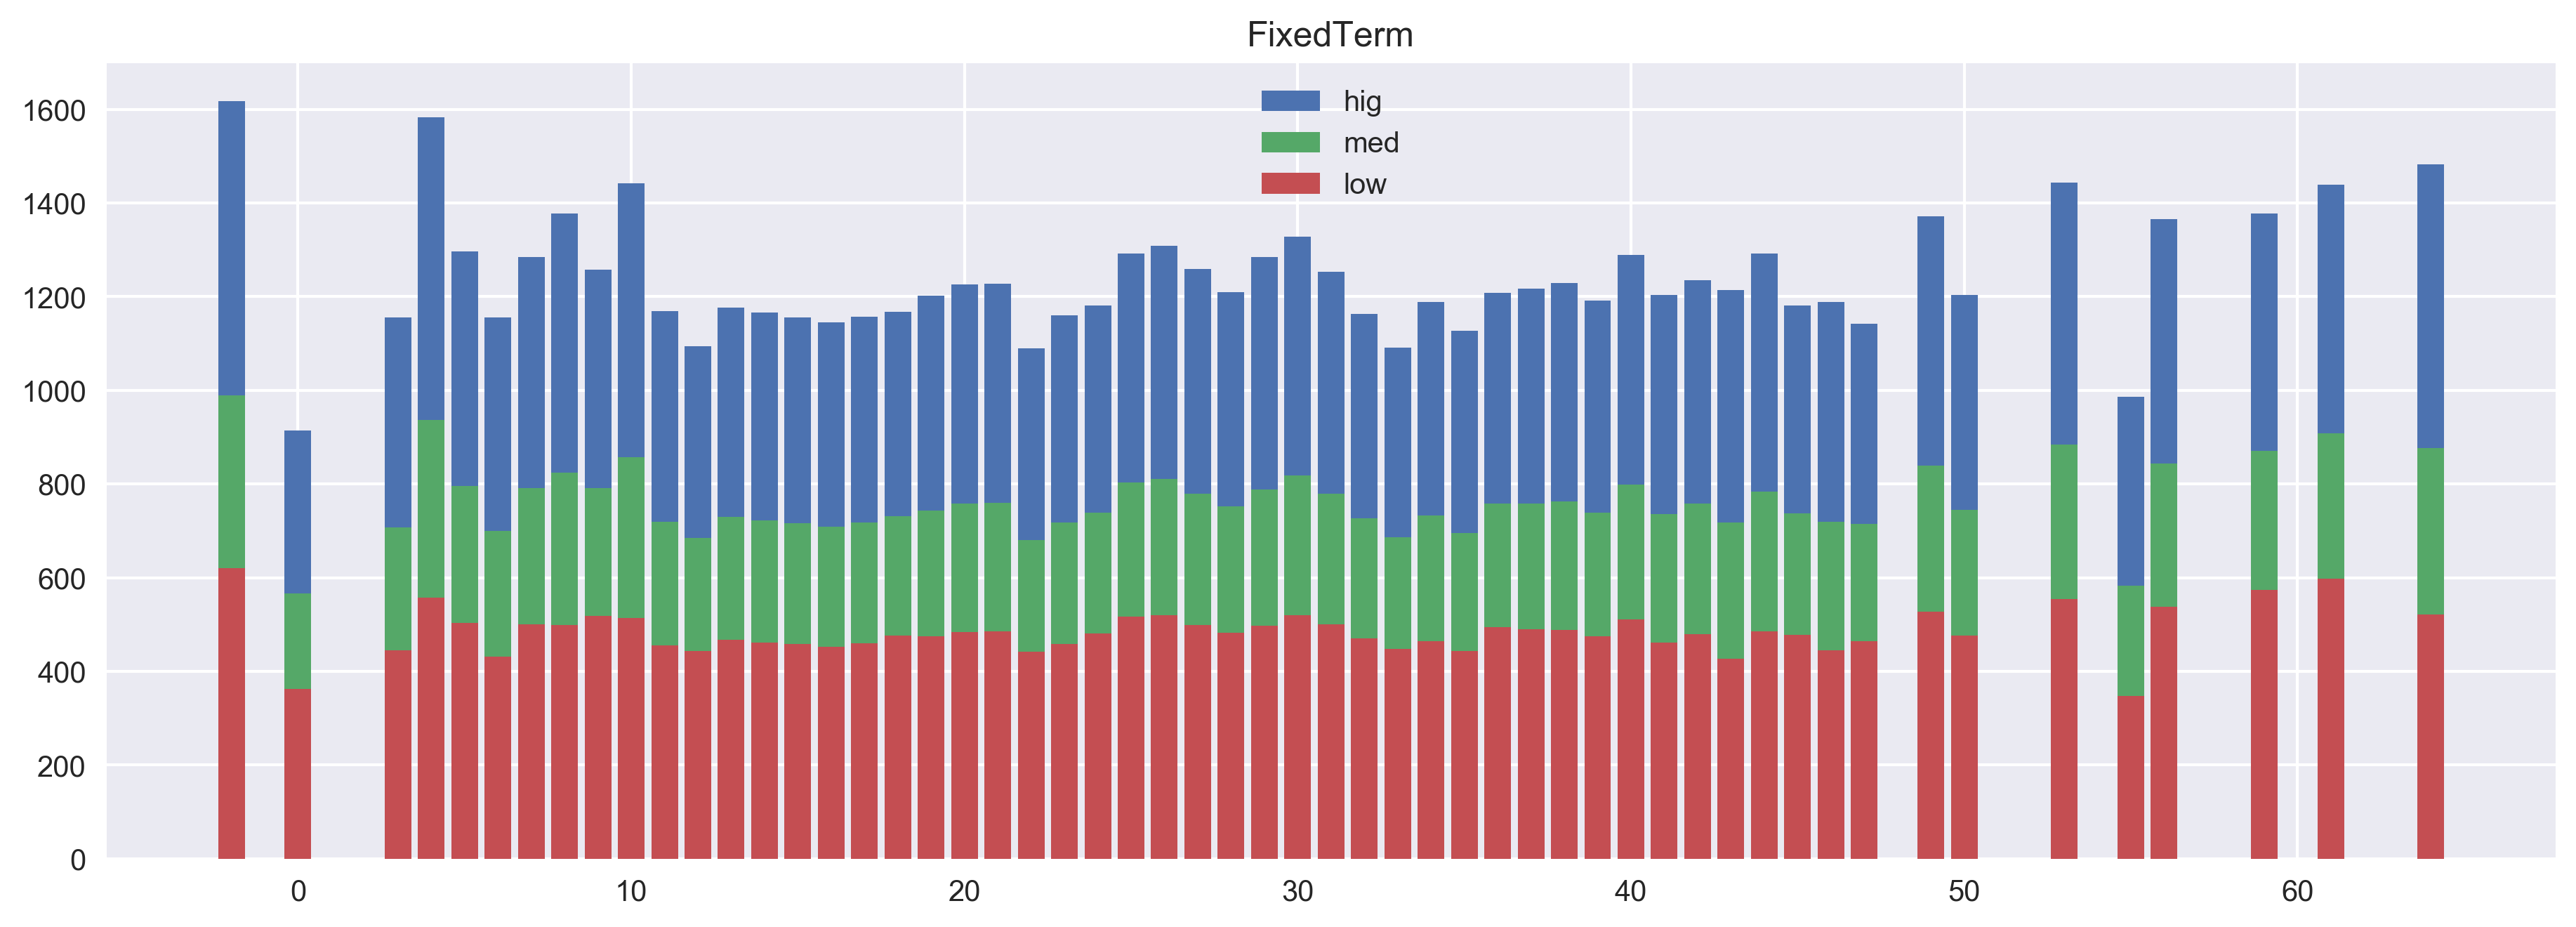

In [21]:
data_fix_72 = data[['FixedTerm','low_cost72','med_cost72','hig_cost72']]
data_fix_72.loc[:,'FixedTerm'] = data_fix_72['FixedTerm'].astype(np.float)
data_fixmean72 = data_fix_72.groupby('FixedTerm').mean()
data_fixmean72.reset_index(inplace=True)

plt.figure(figsize=(15,5),dpi =300)
plt.bar(data_fixmean72['FixedTerm'],data_fixmean72['hig_cost72'],label='hig')
plt.bar(data_fixmean72['FixedTerm'],data_fixmean72['med_cost72'],label='med')
plt.bar(data_fixmean72['FixedTerm'],data_fixmean72['low_cost72'],label='low')
plt.title('FixedTerm')
plt.legend()

In [22]:
#difference beteen the maximum value and minimum value 
print('hig_cost72:')
print(data_fixmean72['hig_cost72'].max()-data_fixmean72['hig_cost72'].min())
print('med_cost72:')
print(data_fixmean72['med_cost72'].max()-data_fixmean72['med_cost72'].min())
print('low_cost72:')
print(data_fixmean72['low_cost72'].max()-data_fixmean72['low_cost72'].min())

hig_cost72:
702.252345
med_cost72:
422.7555650000003
low_cost72:
273.77043928571385


### For MeterType

* for the peak/off-peak split of 0.58/0.42

In [42]:
data_meter =data[['MeterType','low_cost','med_cost','hig_cost']]
data_meter.dropna(inplace=True)

In [43]:
collections.Counter(data_meter['MeterType'])

Counter({'STD': 348472, 'E7': 339838})

In [46]:
data_meter = data[['MeterType','med_cost']]

In [55]:
data_e7 = data[data['MeterType']=='E7']['med_cost'].dropna()
#data_std = data[]
data_std = data[data['MeterType']=='STD']['med_cost'].dropna()

In [27]:
data_metermean = data_meter.groupby('MeterType').mean()
data_metermean

,low_cost,med_cost,hig_cost
MeterType,,,
E7,438.401120,675.457644,1079.848184
STD,464.808099,721.990330,1160.712961


In [28]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_metermean['hig_cost'].max()-data_metermean['hig_cost'].min())
print('med_cost:')
print(data_metermean['med_cost'].max()-data_metermean['med_cost'].min())
print('low_cost:')
print(data_metermean['low_cost'].max()-data_metermean['low_cost'].min())

hig_cost:
80.86477615164426
med_cost:
46.53268639406883
low_cost:
26.406978604968003


* for the peak/off-peak split of 0.72/0.28

In [29]:
data_meter_72 =data[['MeterType','low_cost72','med_cost72','hig_cost72']]

In [31]:
collections.Counter(data_meter_72['MeterType'])

Counter({'STD': 348514, 'E7': 339894})

In [32]:
data_metermean72 = data_meter_72.groupby('MeterType').mean()
data_metermean72

,low_cost72,med_cost72,hig_cost72
MeterType,,,
E7,467.254020,723.930516,1161.790420
STD,464.808099,721.990330,1160.712961


In [33]:
# difference beteen the maximum value and minimum value 
print('hig_cost72:')
print(data_metermean72['hig_cost72'].max()-data_metermean72['hig_cost72'].min())
print('med_cost72:')
print(data_metermean72['med_cost72'].max()-data_metermean72['med_cost72'].min())
print('low_cost72:')
print(data_metermean72['low_cost72'].max()-data_metermean72['low_cost72'].min())


hig_cost72:
1.0774594830973
med_cost72:
1.9401853899009893
low_cost72:
2.4459212664174856


### For EnergyType

* for the peak/off-peak split of 0.58/0.42

In [34]:
data_energy = data[['EnergyType','low_cost','med_cost','hig_cost']]

In [35]:
collections.Counter(data_energy['EnergyType'])

Counter({1: 368009, 2: 320399})

In [38]:
data_energymean = data_energy.groupby('EnergyType').mean()
data_energymean

,low_cost,med_cost,hig_cost
EnergyType,,,
1,451.015742,697.791831,1118.762806
2,452.636957,700.421920,1123.113917


In [39]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_energymean['hig_cost'].max()-data_energymean['hig_cost'].min())
print('med_cost:')
print(data_energymean['med_cost'].max()-data_energymean['med_cost'].min())
print('low_cost:')
print(data_energymean['low_cost'].max()-data_energymean['low_cost'].min())

hig_cost:
4.3511100488767624
med_cost:
2.6300892622861056
low_cost:
1.6212150080842775


* for the peak/off-peak split of 0.72/0.28

In [41]:
data_energy72 = data[['EnergyType','low_cost72','med_cost72','hig_cost72']]

In [42]:
data_energymean72 = data_energy72.groupby('EnergyType').mean()
data_energymean72

,low_cost72,med_cost72,hig_cost72
EnergyType,,,
1,465.338864,721.854676,1159.440473
2,466.793262,724.204513,1163.317823


In [44]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_energymean72['hig_cost72'].max()-data_energymean72['hig_cost72'].min())
print('med_cost:')
print(data_energymean72['med_cost72'].max()-data_energymean72['med_cost72'].min())
print('low_cost:')
print(data_energymean72['low_cost72'].max()-data_energymean72['low_cost72'].min())

hig_cost:
3.8773497574959492
med_cost:
2.3498366955195706
low_cost:
1.454398004061602


### For 'IsPaperBilling'

* for the peak/off-peak split of 0.58/0.42

In [9]:
data_paper = data[['IsPaperBilling','low_cost','med_cost','hig_cost']]
collections.Counter(data_paper['IsPaperBilling'])

Counter({nan: 21027, False: 407065, True: 260316})

In [10]:
data_papermean = data_paper.groupby('IsPaperBilling').mean()
data_papermean

,low_cost,med_cost,hig_cost
IsPaperBilling,,,
False,449.241318,696.648827,1118.696932
True,456.477503,701.030708,1118.209703


In [11]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_papermean['hig_cost'].max()-data_papermean['hig_cost'].min())
print('med_cost:')
print(data_papermean['med_cost'].max()-data_papermean['med_cost'].min())
print('low_cost:')
print(data_papermean['low_cost'].max()-data_papermean['low_cost'].min())

hig_cost:
0.4872285829253542
med_cost:
4.3818804808081495
low_cost:
7.236185794105893


* for the peak/off-peak split 0.72/0.28

In [12]:
data_paper_72 = data[['IsPaperBilling','low_cost72','med_cost72','hig_cost72']]
data_papermean72 = data_paper_72.groupby('IsPaperBilling').mean()
data_papermean72

,low_cost72,med_cost72,hig_cost72
IsPaperBilling,,,
False,463.222937,720.137947,1158.404730
True,470.127311,723.962385,1156.975158


In [13]:
# difference beteen the maximum value and minimum value 
print('hig_cost72:')
print(data_papermean72['hig_cost72'].max()-data_papermean72['hig_cost72'].min())
print('med_cost72:')
print(data_papermean72['med_cost72'].max()-data_papermean72['med_cost72'].min())
print('low_cost72:')
print(data_papermean72['low_cost72'].max()-data_papermean72['low_cost72'].min())

hig_cost72:
1.4295726777215805
med_cost72:
3.824437495219854
low_cost72:
6.904374493127534


### For 'DistId'

* for the peak/off-peak split of 0.58/0.42

In [49]:
data_dis = data[['DistId','low_cost','med_cost','hig_cost']]

In [50]:
collections.Counter(data_dis['DistId'])

Counter({12: 49154,
         22: 49678,
         21: 48780,
         20: 49772,
         11: 49983,
         13: 49173,
         17: 46810,
         10: 49914,
         14: 49657,
         16: 49440,
         19: 48870,
         23: 49487,
         18: 48261,
         15: 49429})

Text(0.5, 1.0, 'DistId')

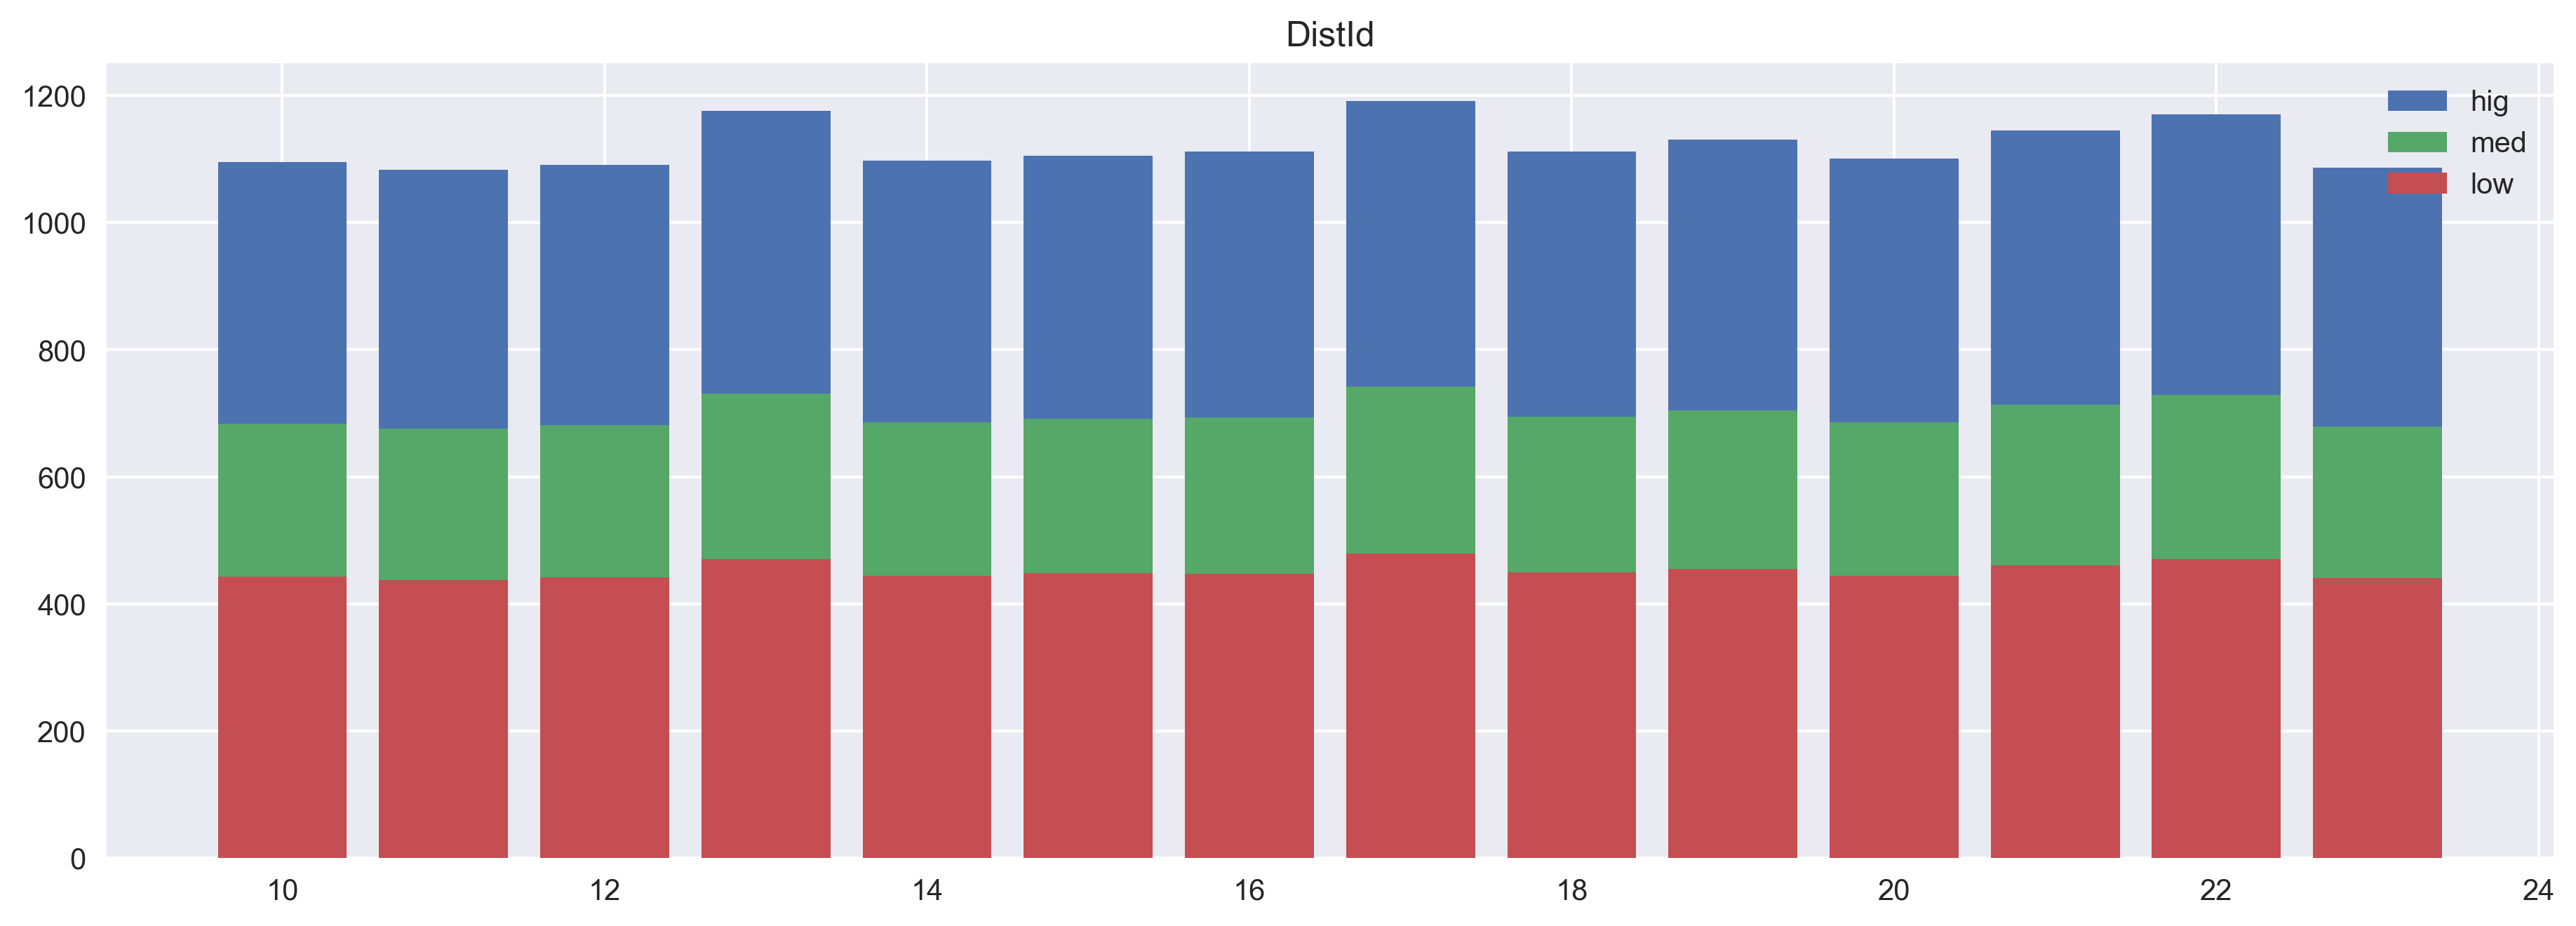

In [51]:
data_dismean = data_dis.groupby('DistId').mean()
data_dismean.reset_index(inplace=True)
plt.figure(figsize=(15,5),dpi=300)
plt.bar(data_dismean['DistId'],data_dismean['hig_cost'],label='hig')
plt.bar(data_dismean['DistId'],data_dismean['med_cost'],label='med')
plt.bar(data_dismean['DistId'],data_dismean['low_cost'],label='low')
plt.legend()
plt.title('DistId')

In [52]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_dismean['hig_cost'].max()-data_dismean['hig_cost'].min())
print('med_cost:')
print(data_dismean['med_cost'].max()-data_dismean['med_cost'].min())
print('low_cost:')
print(data_dismean['low_cost'].max()-data_dismean['low_cost'].min())

hig_cost:
108.4597722182807
med_cost:
66.75036369121858
low_cost:
42.30002076155779


* for the peak/off-peak split of 0.72/0.28

Text(0.5, 1.0, 'DistId')

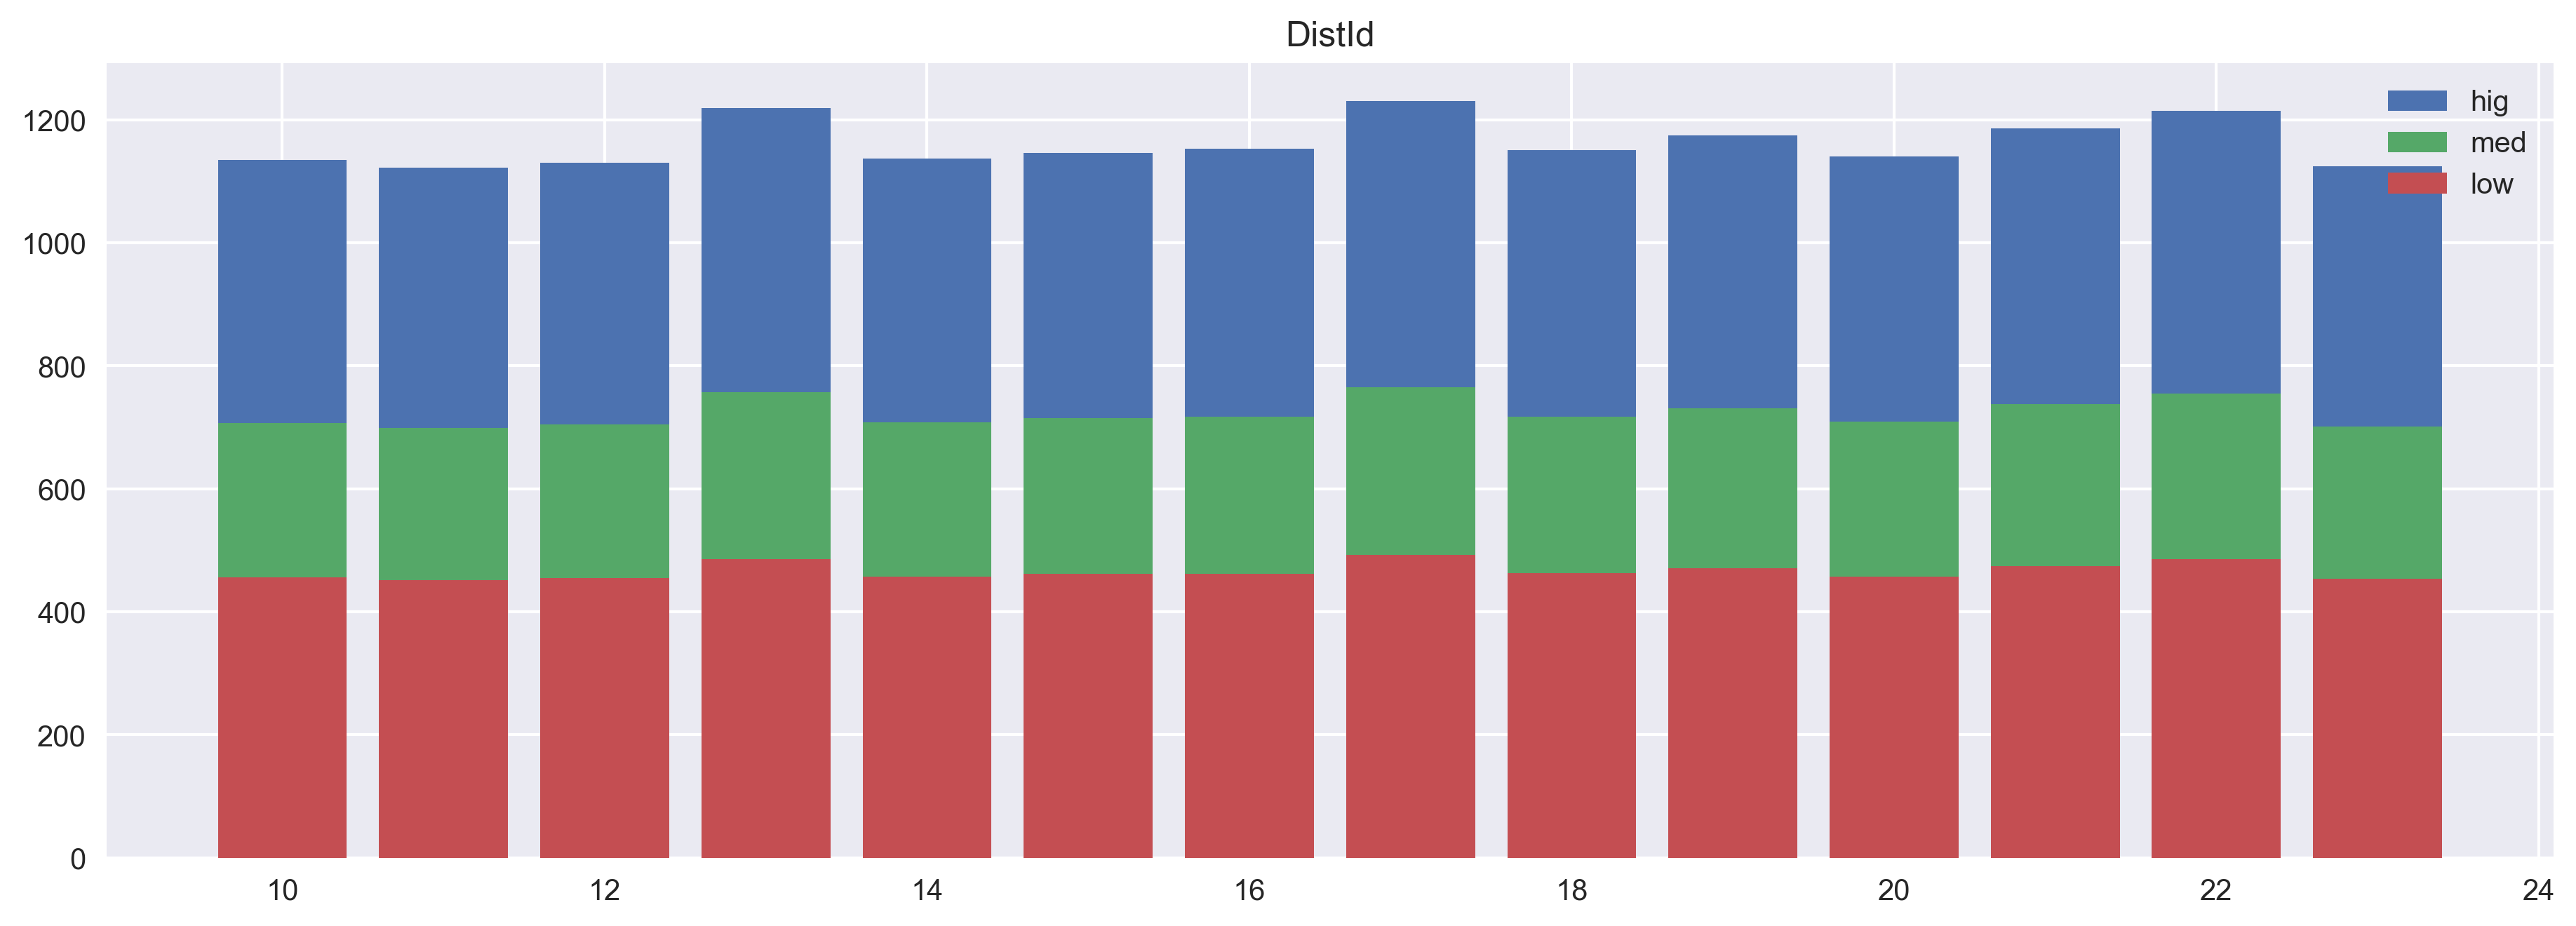

In [35]:
data_dis_72 = data[['DistId','low_cost72','med_cost72','hig_cost72']]
data_dismean72 = data_dis_72.groupby('DistId').mean()
data_dismean72.reset_index(inplace=True)

plt.figure(figsize=(15,5),dpi=300)
plt.bar(data_dismean72['DistId'],data_dismean72['hig_cost72'],label='hig')
plt.bar(data_dismean72['DistId'],data_dismean72['med_cost72'],label='med')
plt.bar(data_dismean72['DistId'],data_dismean72['low_cost72'],label='low')
plt.legend()
plt.title('DistId')

In [54]:
# difference beteen the maximum value and minimum value 
print('hig_cost72:')
print(data_dismean72['hig_cost72'].max()-data_dismean72['hig_cost72'].min())
print('med_cost72:')
print(data_dismean72['med_cost72'].max()-data_dismean72['med_cost72'].min())
print('low_cost72:')
print(data_dismean72['low_cost72'].max()-data_dismean72['low_cost72'].min())

hig_cost72:
107.62730471724535
med_cost72:
66.25791812720024
low_cost72:
42.00689840202136


### For 'IsOnlineBilling'

* for the peak/off-peak split of 0.58/0.42

In [55]:
data_online = data[['IsOnlineBilling','low_cost','med_cost','hig_cost']]
data_online.dropna(inplace=True)

In [56]:
collections.Counter(data_online['IsOnlineBilling'])

Counter({True: 502972, False: 164339})

In [57]:
data_onlinemean = data_online.groupby('IsOnlineBilling').mean()
data_onlinemean

,low_cost,med_cost,hig_cost
IsOnlineBilling,,,
False,451.131476,690.943288,1100.034027
True,452.367857,700.780289,1124.542673


In [58]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_onlinemean['hig_cost'].max()-data_onlinemean['hig_cost'].min())
print('med_cost:')
print(data_onlinemean['med_cost'].max()-data_onlinemean['med_cost'].min())
print('low_cost:')
print(data_onlinemean['low_cost'].max()-data_onlinemean['low_cost'].min())

hig_cost:
24.508645252764154
med_cost:
9.837000461131765
low_cost:
1.2363811005226353


* for the peak/off-peak split of 0.72/0.28

In [59]:
data_online_72 = data[['IsOnlineBilling','low_cost72','med_cost72','hig_cost72']]
data_online_72.dropna(inplace=True)

In [60]:
data_onlinemean72 = data_online_72.groupby('IsOnlineBilling').mean()
data_onlinemean72

,low_cost72,med_cost72,hig_cost72
IsOnlineBilling,,,
False,463.656391,711.985146,1135.604786
True,466.653749,724.780587,1165.114606


In [61]:
# difference beteen the maximum value and minimum value 
print('hig_cost72:')
print(data_onlinemean72['hig_cost72'].max()-data_onlinemean72['hig_cost72'].min())
print('med_cost72:')
print(data_onlinemean72['med_cost72'].max()-data_onlinemean72['med_cost72'].min())
print('low_cost72:')
print(data_onlinemean72['low_cost72'].max()-data_onlinemean72['low_cost72'].min())

hig_cost72:
29.509819536581745
med_cost72:
12.79544158674696
low_cost72:
2.997357961028854


### For 'IsFixed'

* for the peak/off-peak split of 0.58/0.42

In [22]:
data_fix = data[['IsFixed','low_cost','med_cost','hig_cost']]
data_fix.dropna(inplace=True)

In [25]:
data_fixmean = data_fix.groupby('IsFixed').mean()
data_fixmean

,low_cost,med_cost,hig_cost
IsFixed,,,
False,431.634154,690.928128,1133.253143
True,453.405237,699.672539,1119.775584


In [10]:
collections.Counter(data_fix['IsFixed'])

Counter({False: 51720, True: 636688})

In [30]:
# difference beteen the maximum value and minimum value 
print('hig_cost:')
print(data_fixmean['hig_cost'].max()-data_fixmean['hig_cost'].min())
print('med_cost:')
print(data_fixmean['med_cost'].max()-data_fixmean['med_cost'].min())
print('low_cost:')
print(data_fixmean['low_cost'].max()-data_fixmean['low_cost'].min())

hig_cost:
13.477559181970037
med_cost:
8.744410698413049
low_cost:
21.771082697271595


* for the peak/off-peak split of 0.72/0.28

In [33]:
data_fix_72 = data[['IsFixed','low_cost72','med_cost72','hig_cost72']]
data_fix_72.dropna(inplace=True)

In [34]:
data_fixmean72 = data_fix_72.groupby('IsFixed').mean()
data_fixmean72

,low_cost72,med_cost72,hig_cost72
IsFixed,,,
False,452.997514,726.818573,1193.925086
True,467.072769,722.633993,1158.591375


In [31]:
# difference beteen the maximum value and minimum value 
print('hig_cost72:')
print(data_fixmean72['hig_cost72'].max()-data_fixmean72['hig_cost72'].min())
print('med_cost72:')
print(data_fixmean72['med_cost72'].max()-data_fixmean72['med_cost72'].min())
print('low_cost72:')
print(data_fixmean72['low_cost72'].max()-data_fixmean72['low_cost72'].min())

hig_cost72:
35.33371049721677
med_cost72:
4.184580220497537
low_cost72:
14.075254769333753


In [3]:
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [4]:
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [5]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)